In [15]:
'''
input_solver - defines mesh and solves poisson eqaution
'''
import numpy as np
from input_solver import *

T = 300 # K
k = 11.8
Nc = 2.8e19 # /cm^3
Nv = 1.04e19 # /cm^3
Eg = 1.1
mu_n = 1000 # cm^2/V-s
mu_p = 500 # cm^2/V-s
tn = 1000 # us
tp = 1000 # us
affinity = 1 # eV

params = [T,k,Nc,Nv,Eg,mu_n,mu_p,tn,tp,affinity]

Rectangular structure
Total number of nodes = 495

Maximum net doping = 1.000000E+18 /cm³
Minimum net doping = -1.000000E+18 /cm³
Minimum absolute doping = 1.000000E+12 /cm³

Solution converged

Writing mesh and solution to solution.out


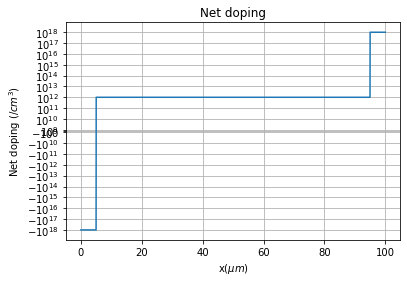

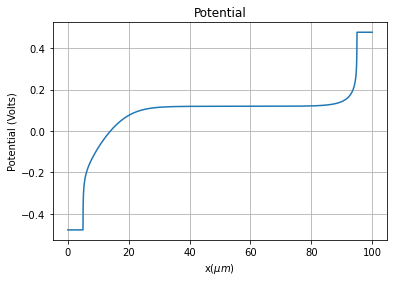

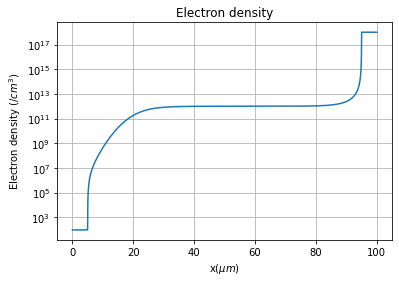

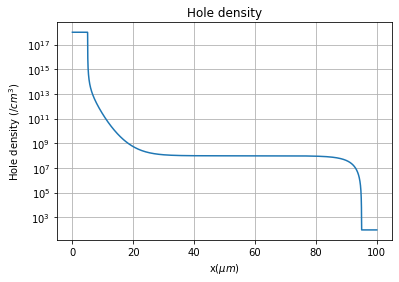

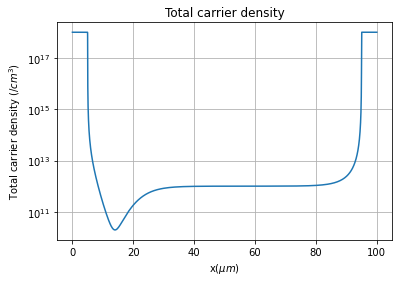

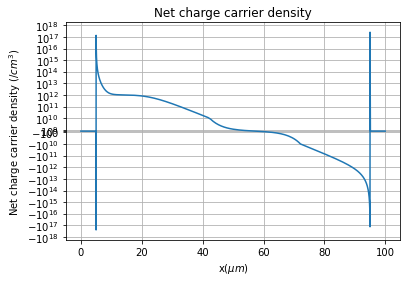

In [16]:
'''
Define doping profile 
Unit of x is microns.
Unit of doping is per cubic centimeter
'''
def doping(x): 
    if(x<5):
        return -1e18
    elif(x>=95):
        return 1e18
    else:
        return 1e12

''' 
Define node positions and mesh spacing about them as [node position,spacing]
Length unit : microns
'''
nodes = [[0,0.5],[5,0.01],[50,1],[95,0.01 ],[100,0.5]]  

'''
Define left and right boundary conditions as [contact_type,value] where value is potential offset for ohmic and schottky contacts and electric field for normal derivative boundary conditionsplotter.plot_1d(x,V,'Potential','volt')
plotter.plot_1d(x,n,'Electron density','density',scale='logy')
plotter.plot_1d(x,p,'Hole density','density',scale='logy')
plotter.plot_1d(x,n+p,'Total carrier density','density',scale='logy')
'o' - ohmic
's' - schottky
'n' - normal electric field
Potential unit - Volts
Electric field unit - Volts/micron
'''
boundary = [['o',0],['o',0]]

mesh,Nd,V,n,p = solution_eq_1d(params,nodes,doping,boundary,geom='rect')

plot_solution_1d(mesh,Nd,V,n,p,params,show=True)

In [17]:
contact = [['o',0],['o',0]]  # set boundary condition at contacts. Unit of potential is volt

def gen(x): # define carrier generation rate by physical process other than thermal generation (Unit : per cubic centimeter per second)
    return 0
    
bias = [-5,1] # Voltage bias sweep (Reverse bias and forward bias) to be applied on left end with respect to right end. Unit of voltage is volt

mesh,Nd,solution_start,solution_end,V,J,J_left,J_right = solve_current(params,nodes,doping,contact,bias)

plot_JV(V,J,params,show=False)

plot_solution_both_ends(mesh,Nd,params,solution_start,solution_end,show=False)

Rectangular structure
Total number of nodes = 495

Maximum net doping = 1.000000E+18 /cm³
Minimum net doping = -1.000000E+18 /cm³
Minimum absolute doping = 1.000000E+12 /cm³

Generation source current = 0.000E+00 A/cm²

V(Volts)	J_left(A/cm²)		J_right(A/cm²)		J(A/cm²)
		Jn	Jp		Jn	Jp
---------------------------------------------------------------------------
0.000		0.000E+00 0.000E+00	0.000E+00 0.000E+00	0.000E+00
-0.026		-5.056E-13 -2.718E-10	-2.723E-10 -2.519E-13	-2.724E-10
-0.052		-6.922E-13 -4.384E-10	-4.385E-10 -3.449E-13	-4.390E-10
-0.077		-7.610E-13 -5.565E-10	-5.569E-10 -3.792E-13	-5.573E-10
-0.103		-7.864E-13 -6.509E-10	-6.510E-10 -3.919E-13	-6.515E-10
-0.129		-7.958E-13 -7.327E-10	-7.331E-10 -3.966E-13	-7.335E-10
-0.155		-7.993E-13 -8.076E-10	-8.081E-10 -3.983E-13	-8.085E-10
-0.180		-8.006E-13 -8.777E-10	-8.778E-10 -3.990E-13	-8.783E-10
-0.206		-8.010E-13 -9.437E-10	-9.442E-10 -3.992E-13	-9.445E-10
-0.232		-8.012E-13 -1.007E-09	-1.008E-09 -3.993E-13	-1.008E-09
-0.258		-8.013E-

-3.222		-8.013E-13 -4.470E-09	-4.471E-09 -3.998E-13	-4.471E-09
-3.247		-8.013E-13 -4.490E-09	-4.490E-09 -3.998E-13	-4.491E-09
-3.273		-8.013E-13 -4.509E-09	-4.510E-09 -3.998E-13	-4.510E-09
-3.299		-8.013E-13 -4.528E-09	-4.529E-09 -3.998E-13	-4.529E-09
-3.325		-8.013E-13 -4.548E-09	-4.548E-09 -3.998E-13	-4.549E-09
-3.351		-8.013E-13 -4.567E-09	-4.568E-09 -3.998E-13	-4.568E-09
-3.376		-8.013E-13 -4.586E-09	-4.587E-09 -3.998E-13	-4.587E-09
-3.402		-8.013E-13 -4.605E-09	-4.606E-09 -3.998E-13	-4.606E-09
-3.428		-8.013E-13 -4.624E-09	-4.624E-09 -3.998E-13	-4.625E-09
-3.454		-8.013E-13 -4.643E-09	-4.643E-09 -3.998E-13	-4.644E-09
-3.479		-8.013E-13 -4.662E-09	-4.662E-09 -3.998E-13	-4.663E-09
-3.505		-8.013E-13 -4.680E-09	-4.681E-09 -3.998E-13	-4.681E-09
-3.531		-8.013E-13 -4.700E-09	-4.699E-09 -3.998E-13	-4.700E-09
-3.557		-8.013E-13 -4.718E-09	-4.718E-09 -3.998E-13	-4.718E-09
-3.582		-8.013E-13 -4.736E-09	-4.736E-09 -3.998E-13	-4.737E-09
-3.608		-8.013E-13 -4.754E-09	-4.755E-09 -3.998E-13	-4.

Cylindrical structure
Number of nodes along x-direction = 103
Number of nodes along y-direction = 67
Total number of nodes = 6901

Maximum net doping = 1.000000E+18 /cm³
Minimum net doping = -1.000000E+18 /cm³
Minimum absolute doping = 1.000000E+12 /cm³

Solution converged for 103 x 67 grid
Solution converged

Writing mesh and solution to solution.out


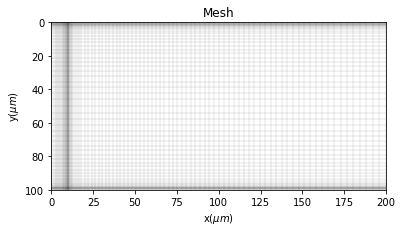

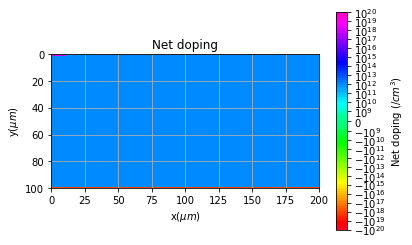

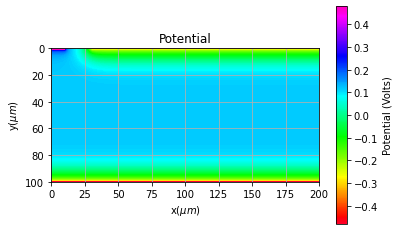

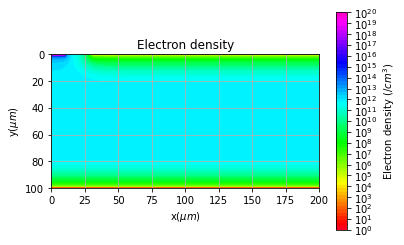

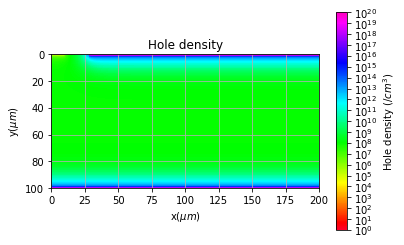

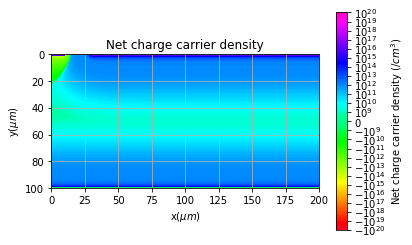

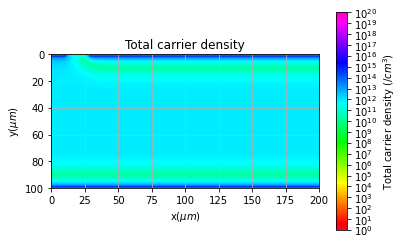

In [18]:
'''
Define doping profile 
Unit of x is microns.
Unit of doping is per cubic centimeter
'''
def doping(x,y):
    if(y<1 and x<10):
        return 1e18
    elif(y<1 and x>30):
        return -1e18
    elif(y>99):
        return -1e18
    else:
        return 1e12
    
''' 
Define node positions and mesh spacing about them as [node position,spacing]
Length unit : microns
'''
nodes_x = [[0,1],[10,0.1],[20,2],[200,4]]
nodes_y = [[0,0.25],[1,0.1],[10,2],[50,4],[90,2],[99,0.1],[100,0.25]]

nodes = [nodes_x,nodes_y]

'''
Define top and bottom boundary conditions as [contact_type,value] where value is potential offset for ohmic and schottky contacts and electric field for normal derivative boundary conditions. Boundary conditions are described for each section. Section is the region between two nodes defined.
'o' - ohmic
's' - schottky
'n' - normal electric field
Potential unit - Volts
Electric field unit - Volts/micron
'''
contact_top = [['n',0],['n',0],['n',0]]
contact_bot = [['n',0],['n',0],['n',0]]

contact = [contact_top,contact_bot]

mesh,Nd,V,n,p = solution_eq_2d(params,nodes,doping,contact,geom='cyl')

plot_solution_2d(mesh,Nd,V,n,p,params,show=True)